<a href="https://colab.research.google.com/github/CAATKU/Machine-Learning-101/blob/main/practice_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px


## importing Pre-Processing Tools 

from sklearn.preprocessing import RobustScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor 

print('Import Completed')

Import Completed


In [4]:



# Import the datasets and preprocessing 

dataset = pd.read_csv('avocado.csv')
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
## Date time settings 
dataset['Date'] = pd.to_datetime(dataset.Date) 
dataset.sort_values(by=['Date'], inplace=True, ascending=True)

## Let us Reset Index 
dataset = dataset.reset_index()


## Remove unnamed column as well as index column
dataset = dataset.drop(columns=['Unnamed: 0','index']) 

## change 4046, 4770, 4225 to their respective values 
dataset = dataset.rename(columns={'4046':'Small Hass', '4225':'Large Hass','4770':'XLarge Hass'}) 

## move the Average Price column to the Last end bcz we need to do that while we are split the dataset in input and output dataset 
dataset = dataset[['Date','Total Volume', 'Small Hass', 'Large Hass', 'XLarge Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'AveragePrice']]

In [9]:
dataset.head()

,Date,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePrice
0,2015-01-04,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,1.75
1,2015-01-04,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS,1.46
2,2015-01-04,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa,1.70
3,2015-01-04,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver,0.99
4,2015-01-04,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville,0.92


Let's Do some Exploratory Analysis

In [10]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   Total Volume  18249 non-null  float64       
 2   Small Hass    18249 non-null  float64       
 3   Large Hass    18249 non-null  float64       
 4   XLarge Hass   18249 non-null  float64       
 5   Total Bags    18249 non-null  float64       
 6   Small Bags    18249 non-null  float64       
 7   Large Bags    18249 non-null  float64       
 8   XLarge Bags   18249 non-null  float64       
 9   type          18249 non-null  object        
 10  year          18249 non-null  int64         
 11  region        18249 non-null  object        
 12  AveragePrice  18249 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
## There are no null values at all .. 
# There are two features 1.Type 2.Region that is categorical data ..

In [11]:
dataset.describe()

,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice
count,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,1.405978
std,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,0.402677
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.440000
25%,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,1.100000
50%,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,1.370000
75%,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,1.660000
max,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,3.250000


In [13]:
""" All seems good and perfect but i see that there are some outliers we need to take care of.The standard 
Deviation of Average Price. is about 0.4 but the 75th percentile is about 1.66, and even the 25% percentile 
seems to be over 1.1, hence we need to take care of these outliers.We'll do this in the Pre-Processing section below."""

" All seems good and perfect but i see that there are some outliers we need to take care of.The standard \nDeviation of Average Price. is about 0.4 but the 75th percentile is about 1.66, and even the 25% percentile \nseems to be over 1.1, hence we need to take care of these outliers.We'll do this in the Pre-Processing section below."

In [12]:
dataset.isna().sum()

Date            0
Total Volume    0
Small Hass      0
Large Hass      0
XLarge Hass     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
AveragePrice    0
dtype: int64

In [14]:
## Let's make some plots 

# --> Distribution of Average Price
# --> Distribution of Volumne 
# --> Count of Hasses 
# --> Count of Bags 
# --> Count of Year 
# --> Count of Region 

In [15]:
## Distribution of Price 

px.histogram(x=dataset['AveragePrice'])

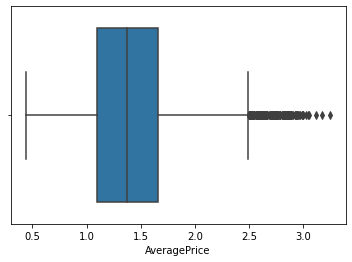

In [16]:
sns.boxplot(x=dataset['AveragePrice'])

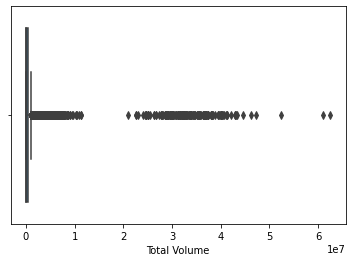

In [17]:
sns.boxplot(x=dataset['Total Volume'])

In [ ]:
### here we can see that there are a LOT of outliers, especially in the volume column.So dealing with outliers 
### was and will be the main reason of this project.



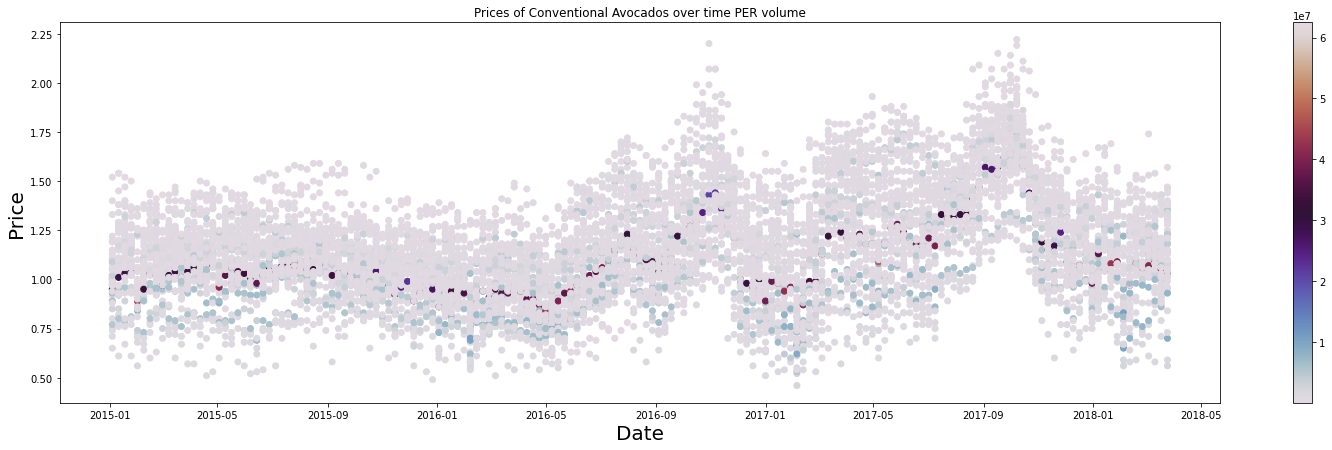

In [27]:
## checking the prices of conventional avacados 

conventional_avocados = dataset['type'] == 'conventional'
organic_avocados = dataset['type'] == 'organic' 

fig = plt.figure(figsize = (26,7))


## data conventional 

dates_conventional = dataset[conventional_avocados]['Date'].tolist()
average_price_conventional = dataset[conventional_avocados]['AveragePrice'].tolist()
total_volume_conventional = dataset[conventional_avocados]['Total Volume']

## Data Organic 

dates_organic = dataset[organic_avocados]['Date'].tolist() 
average_prices_organic = dataset[organic_avocados]['AveragePrice'].tolist() 
total_volume_organic = dataset[organic_avocados]['Total Volume'] 

plt.scatter(dates_conventional, average_price_conventional, c=total_volume_conventional, cmap='twilight')
plt.colorbar() 
plt.xlabel('Date', fontsize=20) 
plt.ylabel('Price', fontsize=20) 
plt.title('Prices of Conventional Avocados over time PER volume') 
plt.show()

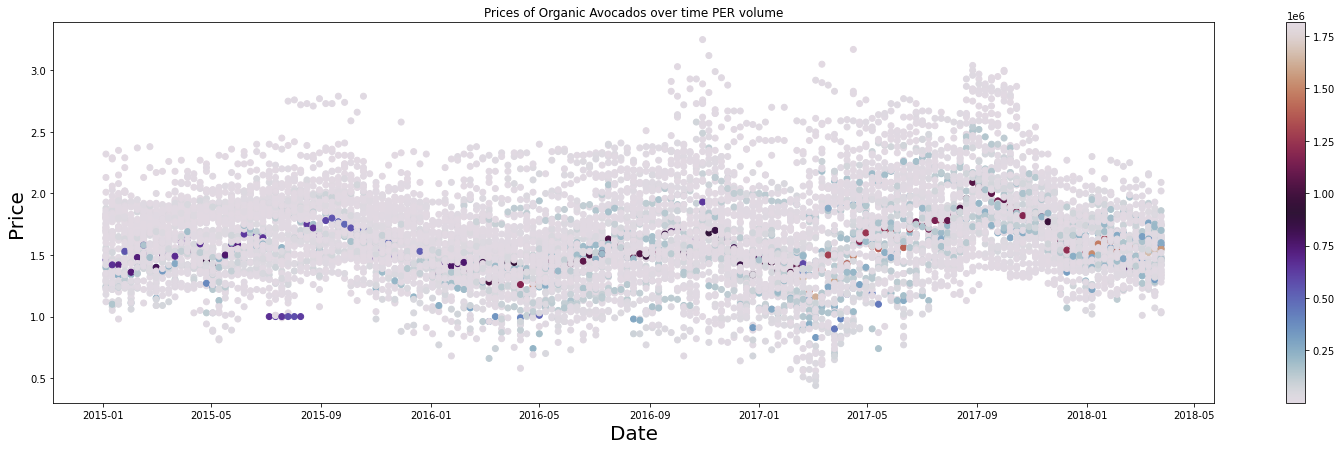

In [29]:
fig = plt.figure(figsize = (26,7)) 
plt.scatter(dates_organic, average_prices_organic, c=total_volume_organic, cmap='twilight') 
plt.colorbar() 
plt.xlabel('Date', fontsize=20) 
plt.ylabel('Price', fontsize=20) 
plt.title('Prices of Organic Avocados over time PER volume') 
plt.show()

In [30]:
dataset.region.value_counts()

Southeast              338
TotalUS                338
Boston                 338
Plains                 338
Orlando                338
Roanoke                338
Midsouth               338
Seattle                338
SanFrancisco           338
CincinnatiDayton       338
Albany                 338
GrandRapids            338
Houston                338
Syracuse               338
Spokane                338
StLouis                338
DallasFtWorth          338
LasVegas               338
Atlanta                338
Boise                  338
Pittsburgh             338
Chicago                338
SouthCentral           338
MiamiFtLauderdale      338
RaleighGreensboro      338
NorthernNewEngland     338
HarrisburgScranton     338
NewYork                338
LosAngeles             338
Tampa                  338
Denver                 338
Louisville             338
HartfordSpringfield    338
Charlotte              338
Portland               338
Nashville              338
Columbus               338
S

In [31]:
dataset.region.unique()

array(['Southeast', 'TotalUS', 'Tampa', 'Denver', 'Louisville',
       'HartfordSpringfield', 'Charlotte', 'Portland', 'Nashville',
       'Columbus', 'Sacramento', 'NewOrleansMobile', 'SanDiego',
       'LosAngeles', 'GreatLakes', 'PhoenixTucson', 'Indianapolis',
       'Philadelphia', 'Detroit', 'Jacksonville', 'RichmondNorfolk',
       'BuffaloRochester', 'Northeast', 'SouthCarolina', 'West',
       'California', 'NewYork', 'HarrisburgScranton',
       'NorthernNewEngland', 'Boston', 'Plains', 'Orlando', 'Roanoke',
       'Midsouth', 'Seattle', 'WestTexNewMexico', 'SanFrancisco',
       'CincinnatiDayton', 'Albany', 'GrandRapids', 'Houston', 'Syracuse',
       'Spokane', 'StLouis', 'DallasFtWorth', 'LasVegas', 'Atlanta',
       'Boise', 'Pittsburgh', 'Chicago', 'SouthCentral',
       'MiamiFtLauderdale', 'RaleighGreensboro', 'BaltimoreWashington'],
      dtype=object)

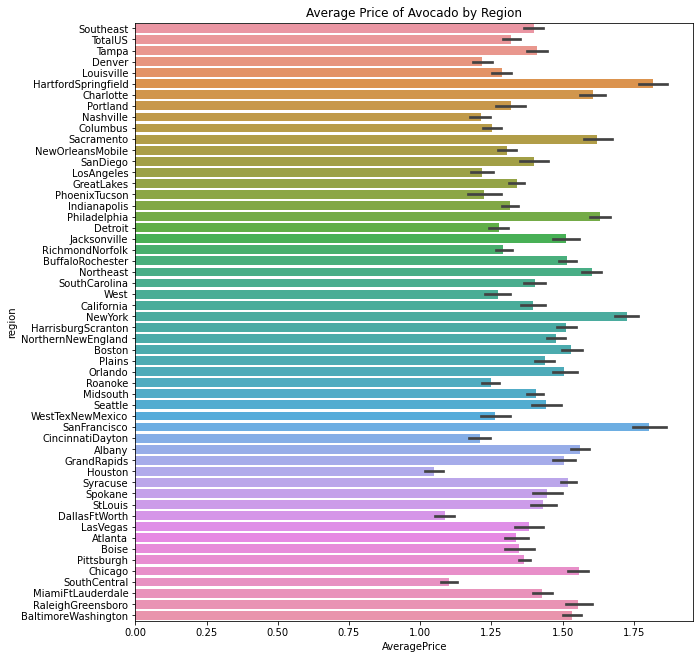

In [33]:
## Average Prices by region

plt.figure(figsize=(10,11)) 
plt.title('Average Price of Avocado by Region') 
sns.barplot(y='region', x='AveragePrice', data=dataset) 
plt.show()

In [ ]:
##  let's do some preprocessing 